In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


In [2]:
train_data = pd.read_csv('option_train.csv')
train_data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [3]:
train_data['BS'].value_counts()

Under    946
Over     734
Name: BS, dtype: int64

In [4]:
train_data.describe()

,Value,S,K,tau,r
count,1678.000000,1679.000000,1678.000000,1679.000000,1680.000000
mean,15.068709,464.402535,438.241955,0.437519,0.030235
std,14.040023,973.652179,23.408989,7.057555,0.000557
min,0.125000,0.000000,375.000000,0.003968,0.029510
25%,2.255001,433.863864,420.000000,0.119048,0.029820
50%,11.190967,442.634081,440.000000,0.202381,0.030130
75%,25.747434,447.320414,455.000000,0.285714,0.030540
max,60.149367,40333.000000,500.000000,250.000000,0.031880


In [5]:
train_data.shape

(1680, 6)

In [6]:
train_data = train_data[train_data['S'].notna()]

df1 = train_data.copy()

#train_data.rename(columns = {0:'Value',1:'S',2:'K',3:'tau', 4:'r', 5:'BS'})

# Convert the target variable to binary form
train_data['BS'] = train_data['BS'].replace({'Under': 0, 'Over': 1})

train_data.loc[train_data['S'] == 40333] = None

train_data.loc[train_data['S'] == 0] = None

train_data.loc[train_data['tau'] == 250] = None

train_data.loc[train_data['tau'] == 146] = None

imputer = KNNImputer(n_neighbors = 5, weights = 'distance', metric = 'nan_euclidean')
train_data = pd.DataFrame(imputer.fit_transform(train_data))
train_data.describe()

,0,1,2,3,4,5
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,15.092353,440.898582,438.218638,0.202018,0.030235,0.435821
std,14.029169,7.520612,23.381921,0.099641,0.000557,0.495420
min,0.125000,425.472331,375.000000,0.003968,0.029510,0.000000
25%,2.255002,433.875313,420.000000,0.119048,0.029820,0.000000
50%,11.250000,442.525366,438.210872,0.202381,0.030130,0.000000
75%,25.745904,447.320414,455.000000,0.285714,0.030540,1.000000
max,60.149367,455.880619,500.000000,0.392857,0.031880,1.000000


In [7]:
train_data.rename(columns = {0:'Value',1:'S',2:'K',3:'tau', 4:'r', 5:'BS'}, inplace = True)

In [8]:
# train_data = train_data.drop(train_data.loc[train_data['S']==40333].index)
# train_data.describe()

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.shape

(1679, 6)

In [11]:
train_data = train_data.drop(train_data.loc[train_data['S']==40333].index)
train_data = train_data.drop(train_data.loc[train_data['S']==0].index)
train_data = train_data.drop(train_data.loc[train_data['tau']==250].index)
train_data = train_data.drop(train_data.loc[train_data['tau']==146].index)

In [12]:
train_data.shape

(1679, 6)

In [13]:
train_data['BS'].value_counts()

0.000000    945
1.000000    730
0.435821      4
Name: BS, dtype: int64

In [14]:
X = train_data[['S','K','tau','r']]
y = train_data[['Value']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=10)

In [16]:
#regr = RandomForestRegressor(max_depth=2, random_state=0)
#regr.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators = 30, max_features = 'sqrt', max_depth = 10, random_state = 10).fit(X_train, y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_22360\2944886666.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators = 30, max_features = 'sqrt', max_depth = 10, random_state = 10).fit(X_train, y_train)


In [17]:
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test,prediction)
print(mse)
print(r2)

1.854247705121418
0.9908162447366978


In [18]:
train_data['BS'] = pd.factorize(train_data['BS'])[0]
train_data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [19]:
train_data['BS'].value_counts()

0    945
1    730
2      4
Name: BS, dtype: int64

In [20]:
train_data.loc[train_data['BS'] == 2, 'BS'] = 1

In [21]:
train_data['BS'].unique()

array([0, 1], dtype=int64)

In [22]:
X_cl = train_data[['S','K','tau','r']]
y_cl = train_data[['BS']]

In [23]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl,test_size=0.30,random_state=2)

In [24]:
clf_rf = RandomForestClassifier(random_state=1, n_estimators = 30)
clf_rf.fit(X_train_cl, y_train_cl)
y_pred_rf = clf_rf.predict(X_test_cl)
score_test_rf = accuracy_score(y_test_cl, y_pred_rf)
print("The classification Accuracy is {}".format(round(score_test_rf,2)))

C:\Users\HP\AppData\Local\Temp\ipykernel_22360\2306825301.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train_cl, y_train_cl)


The classification Accuracy is 0.94


Area Under Curve (AUC) is 0.981967029985797


<Figure size 640x480 with 0 Axes>

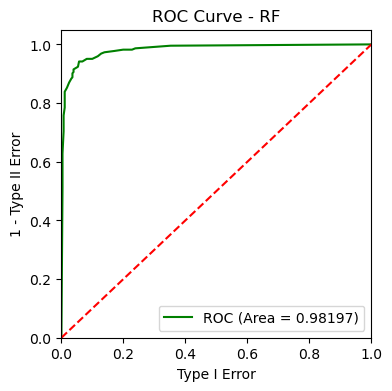

In [25]:
#Getting the probabilities
y_proba = clf_rf.predict_proba(X_test_cl)

# Getting the probabilities
y_prob = y_proba[:, 1]

# Calculating the false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(y_test_cl, y_prob)

# Calculating the AUC score
auc = roc_auc_score(y_test_cl, y_prob)


# Plotting the ROC curve
plt.figure()
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label = 'ROC (Area = {0:.5f})'.format(auc), color = 'green')
plt.plot([0, 1], [0, 1], color = 'red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc = "lower right")
plt.xlabel('Type I Error')
plt.ylabel('1 - Type II Error')
plt.title('ROC Curve - RF')


print('Area Under Curve (AUC) is', auc)




1. Logistic Regression

In [26]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl,test_size=0.30,random_state=2)
clf = LogisticRegression(random_state=1)

In [27]:
# train the classifier on the training set
clf.fit(X_train_cl, y_train_cl)

# predict the labels for the test set
y_pred_cl = clf.predict(X_test_cl)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# evaluate the performance of the classifier
score = accuracy_score(y_test_cl, y_pred_cl)
print('Accuracy:', score)

Accuracy: 0.9007936507936508


Area Under Curve (AUC) is 0.9660086494422546


<Figure size 640x480 with 0 Axes>

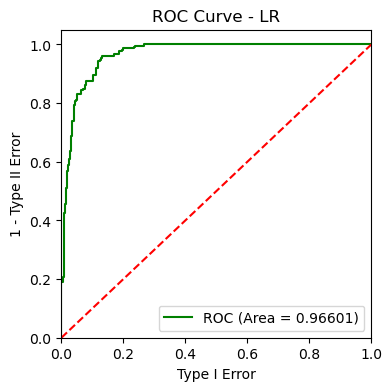

In [29]:
#Getting the probabilities
y_proba = clf.predict_proba(X_test_cl)

# Getting the probabilities
y_prob = y_proba[:, 1]

# Calculating the false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(y_test_cl, y_prob)

# Calculating the AUC score
auc = roc_auc_score(y_test_cl, y_prob)


# Plotting the ROC curve
plt.figure()
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label = 'ROC (Area = {0:.5f})'.format(auc), color = 'green')
plt.plot([0, 1], [0, 1], color = 'red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc = "lower right")
plt.xlabel('Type I Error')
plt.ylabel('1 - Type II Error')
plt.title('ROC Curve - LR')


print('Area Under Curve (AUC) is', auc)


